In [38]:
# Importing necessary libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Loading dataset
df=pd.read_csv('Skyserver.csv')

In [86]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


##### Feature Description

The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:
View "PhotoObj"

    objid = Object Identifier
    ra = J2000 Right Ascension (r-band)
    dec = J2000 Declination (r-band)

Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://en.wikipedia.org/wiki/Right_ascension

    u = better of DeV/Exp magnitude fit
    g = better of DeV/Exp magnitude fit
    r = better of DeV/Exp magnitude fit
    i = better of DeV/Exp magnitude fit
    z = better of DeV/Exp magnitude fit

The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

    run = Run Number
    rereun = Rerun Number
    camcol = Camera column
    field = Field number

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

    run number, which identifies the specific scan,
    the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
    the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
    An additional number, rerun, specifies how the image was processed.

View "SpecObj"

    specobjid = Object Identifier
    class = object class (galaxy, star or quasar object)

The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

    redshift = Final Redshift
    plate = plate number
    mjd = MJD of observation
    fiberid = fiber ID

In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

In [87]:
# Exploring Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [88]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [89]:
# Correlation Matrix
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

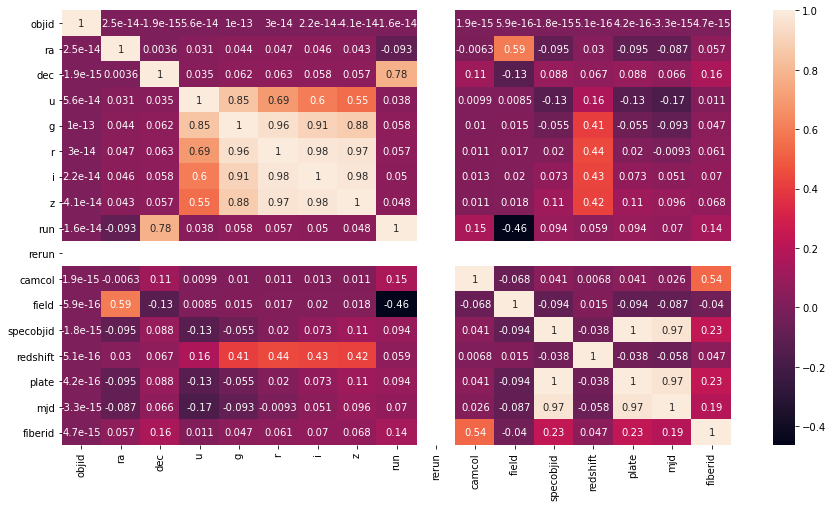

In [90]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

Observation

1. u,g,r,i,z are highly correlated with each other.

2. reshift is also correlated with u,g,r,i,z.

In [91]:
# We don't need objid, specobjid, rerun for classification
df.drop(["objid", "specobjid", "rerun"], axis = 1, inplace = True)

In [92]:
df.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

In [93]:
# QSO data deleting for binary classification. We just need star and galacy classes
df = df[df["class"] != "QSO"]

GALAXY    4998
STAR      4152
Name: class, dtype: int64

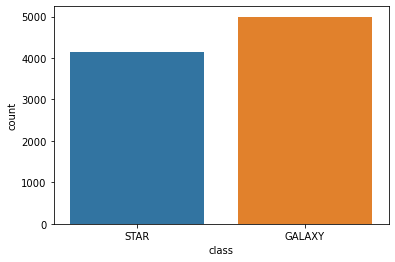

In [94]:
sns.countplot(x= "class", data = df)
df["class"].value_counts()

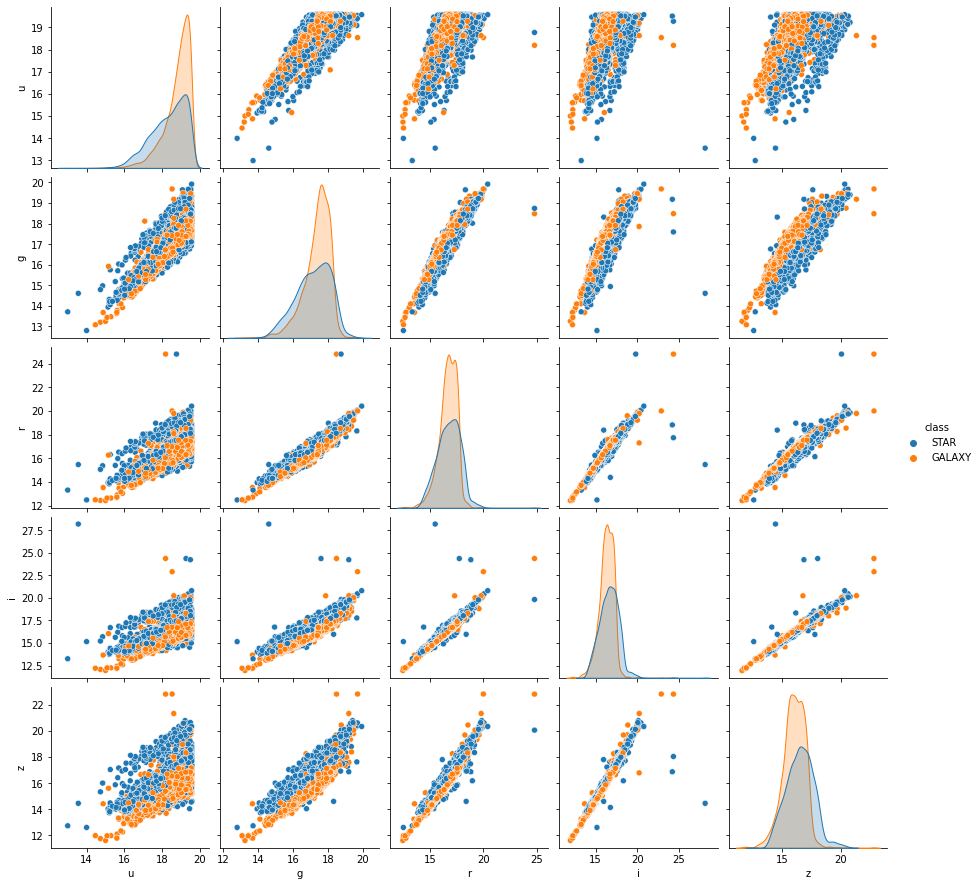

In [95]:
# Pairplot
sns.pairplot(df.loc[:,["u", "g", "r", "i", "z", "class"]], hue = "class")
plt.show()

In [96]:
# Galaxy = 1 and Star = 0
df['class_binary'] = [1 if i == 'GALAXY' else 0 for i in df.loc[:,'class']]

<ipython-input-96-7fccfcc96c6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class_binary'] = [1 if i == 'GALAXY' else 0 for i in df.loc[:,'class']]


In [97]:
# Convert STAR and GALAXY classes to int. For binary classification
df["class"] = [1 if each == "GALAXY" else 0 for each in df["class"]] 
# After converting operation. We call Star as 0 and Galaxy as 1

<ipython-input-97-d02d1bd7666a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["class"] = [1 if each == "GALAXY" else 0 for each in df["class"]]


In [98]:
# data after preparation - formatting operations
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid,class_binary
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,0,-0.000009,3306,54922,491,0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,0,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,1,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,0,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0,0.000590,3306,54922,512,0


## Model building

In [99]:
# value selection and normalization
y = df["class"].values
x = df.drop(["class"], axis = 1)

In [100]:
# after normalization
x.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid,class_binary
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,-0.000009,3306,54922,491,0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0.000590,3306,54922,512,0


In [101]:
# data separation for train - test operations
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [102]:
# Dictionary for score results of classification models
algorithmPerfomanceDict = {}
#algorithmPerfomanceDict = {'ClassificationModel': 1, 'Accuracy': 2}

In [103]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
logisticRegressionScore = lr.score(x_test, y_test)
print("Score of Logistic Regression : {0}".format(logisticRegressionScore))
algorithmPerfomanceDict['LogisticRegression'] = logisticRegressionScore

Score of Logistic Regression : 0.8765027322404372


/home/neelesh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/neelesh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


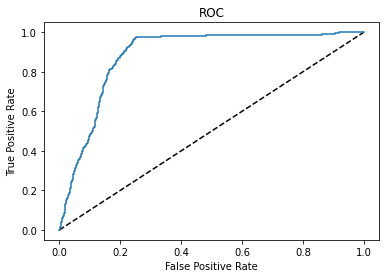

In [105]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report

x,y = df.loc[:,(df.columns != 'class') & (df.columns != 'class_binary')], df.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) # Number of neighbors to consider.
knn.fit(x_train, y_train)
knnScore = knn.score(x_test, y_test)
print("Score of KNN Regression : {0}".format(knnScore))
algorithmPerfomanceDict['KNeighborsClassifier'] = knnScore

Score of KNN Regression : 0.8255009107468124


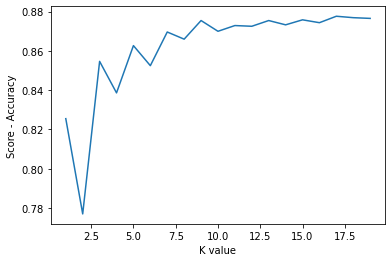

In [107]:


#Lets find best K value
scoreList = []
for each in range(1, 20):
    optimumKnn = KNeighborsClassifier(n_neighbors = each)
    optimumKnn.fit(x_train, y_train)
    scoreList.append(optimumKnn.score(x_test, y_test))
    
plt.plot(range(1, 20), scoreList)
plt.xlabel("K value")
plt.ylabel("Score - Accuracy")
plt.show();

In [108]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 3)
knn_cv.fit(x, y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 49}
Best score: 0.8582513661202186


In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg, x, y, cv = k) # uses R^2 as score 
print('CV Scores : ',cv_result)
print('CV Average Score : ',np.sum(cv_result) / k)

CV Scores :  [0.77064887 0.78036931 0.74727309 0.72932033 0.79034514]
CV Average Score :  0.7635913467800667


In [110]:
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)
svmScore = svm.score(x_test, y_test)
print("Accuracy of Support Vector Machine is : ", svmScore)
algorithmPerfomanceDict['SVM'] = svmScore

Accuracy of Support Vector Machine is :  0.8699453551912568


In [111]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_test, y_test)
naiveBayesScore = nb.score(x_test, y_test)
print("Accuracy of Naive Bayes Classifier is : ", naiveBayesScore)
algorithmPerfomanceDict['NaiveBayesClassifier'] = naiveBayesScore

Accuracy of Naive Bayes Classifier is :  0.8684881602914389


In [112]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
decisionTreeScore = dt.score(x_test, y_test)
print("Accuracy of Decision Tree Classifier is : ", decisionTreeScore)
algorithmPerfomanceDict['DecisionTreeClassifier'] = decisionTreeScore

Accuracy of Decision Tree Classifier is :  0.9981785063752276


In [113]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42) #Number of trees in forest.
rf.fit(x_train, y_train)
randomForestScore = rf.score(x_test, y_test)
print("Accuracy of Random Forest Classifier is : ", randomForestScore)
algorithmPerfomanceDict['RandomForestClassifier'] = randomForestScore

Accuracy of Random Forest Classifier is :  0.9970856102003643


In [114]:
algorithmPerfomanceDict

{'LogisticRegression': 0.8765027322404372,
 'KNeighborsClassifier': 0.8255009107468124,
 'SVM': 0.8699453551912568,
 'NaiveBayesClassifier': 0.8684881602914389,
 'DecisionTreeClassifier': 0.9981785063752276,
 'RandomForestClassifier': 0.9970856102003643}

In [115]:
comparisonData = pd.DataFrame.from_dict(algorithmPerfomanceDict, orient = 'index', columns = ["Accuracy"])
comparisonData.head(10)

,Accuracy
LogisticRegression,0.876503
KNeighborsClassifier,0.825501
SVM,0.869945
NaiveBayesClassifier,0.868488
DecisionTreeClassifier,0.998179
RandomForestClassifier,0.997086


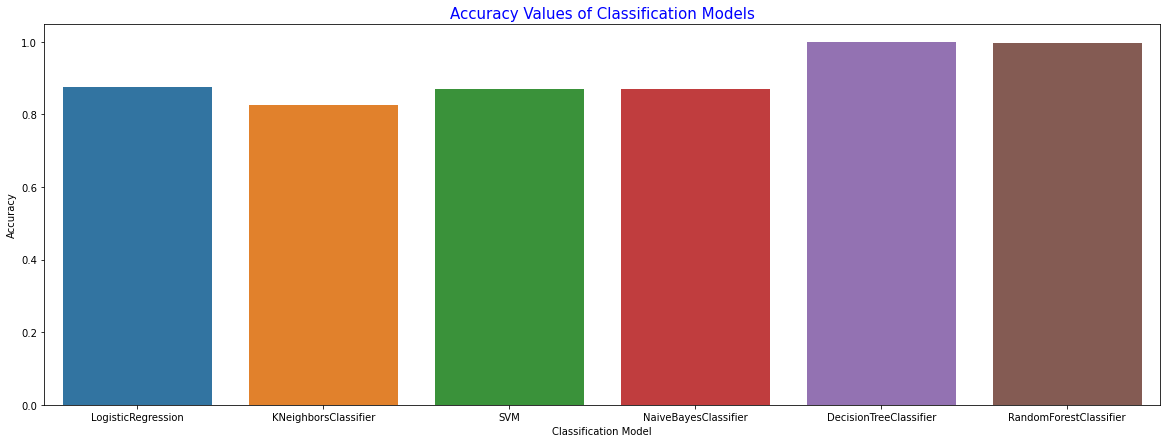

In [116]:
plt.figure(figsize = (20, 7))
sns.barplot(x = comparisonData.index, y = comparisonData.Accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Classification Model')
plt.title('Accuracy Values of Classification Models', color = 'blue', fontsize = 15)
plt.show()

## Conclusion

1. The best accuracy is obtained using Decision tree Classifier.

2. The Random forrest does lag much behind.